# House Prices DataSet

### Functions

In [1]:
def diagnostic_plots(data, variable):

    """
        Displays three diagnostic plots (Histogram, Q-Q Plot, and Boxplot) side by side for a given variable.
    
        Parameters:
        - data: pd.DataFrame
            The dataset containing the variable.
        - variable: str
            The name of the variable to be visualized.
    
        The function creates:
        1. Histogram — to visualize the distribution of the variable.
        2. Q-Q Plot — to assess normality by comparing the quantiles to a normal distribution.
        3. Boxplot — to detect outliers and understand the spread of the variable.
    """

    # Set the figure size for all three plots
    plt.figure(figsize=(14, 4))
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[variable], bins=30) #111
    plt.title('Histogram')
    # Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist='norm', plot=plt) #111
    plt.ylabel('Variable quantiles')
    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable]) #111
    plt.title('Boxplot')
    plt.tight_layout()
    plt.show()
    

def reg_plots(data, variable):
    """
        Displays a scatter plot with a regression line to visualize the linear relationship 
        between a given variable and the target variable 'SalePrice'.
    
        Parameters:
        - data: pd.DataFrame  
            The dataset containing the variables.
        - variable: str  
            The name of the explanatory (independent) variable.
    
        The plot shows:
        - Each data point as a scatter.
        - A red regression line indicating the linear trend.
        - Helps identify linear patterns, correlation, and outliers.
    """
    # Set figure size
    plt.figure(figsize=(8, 6))
    # Scatter plot with regression line
    sns.regplot(
        x=data[variable], 
        y=data['SalePrice'], 
        scatter_kws={'alpha':0.5}, 
        line_kws={'color':'red'}
    )
    # Axis labels
    plt.xlabel(variable)
    plt.ylabel('SalePrice')
    # Add grid for better readability
    plt.grid(True)
    # Show the plot
    plt.show()
               

def hist_plots(data, variable, bins):
    '''
        Plots a histogram for a given variable.
    
        Parameters:
            - data: pd.DataFrame  
                The dataset containing the variables.
            - variable: str  
                The name of the explanatory (independent) variable.
            - bins: int
                Number of bins (bars) in the histogram
    '''

    # Create the histogram for the selected variable
    fig = data[variable].hist(bins=bins)
    # Set the plot title
    fig.set_title(variable)
    # Show the plot
    plt.show()
    

def box_plots(data, variable):
    '''
        Plots a boxplot for a given variable.
        
        Parameters:
            - data: pd.DataFrame  
                The dataset containing the variables.
            - variable: str  
                The name of the explanatory (independent) variable.
    '''

    # Create a boxplot for the selected variable
    sns.boxplot(y=data[variable])
    # Set the plot title
    plt.title('Boxplot')
    # Display the plot
    plt.show()
    

def missing_data_info(data, threshold=0):
    '''
        Displays information about missing values in the dataset.
        Creates a DataFrame with three columns: variable name, proportion of missing values, and data type.
        
        Parameters:
            - data: pd.DataFrame  
                The dataset to analyze.
            - threshold: float, optional (default=0)  
                The minimum percentage threshold (from 1 to 100) of missing values for variables to be included.  
                If set to 0 (default), returns all variables with any missing values.  
                If set to a value > 0, returns only variables with missing value percentage greater than the threshold.
        
        Returns:
            - pd.DataFrame  
                A DataFrame containing variables with missing values above the threshold, their missing value proportions, and data types.
    '''

    # Check that threshold is within the valid range 0 to 100
    if threshold < 0 or threshold > 100:
        print('The percentage can be from 1 to 100')
        return
    # Calculate the proportion of missing values per column, sorted descending
    missing_fields = data.isnull().mean().sort_values(ascending=False)
    # If threshold > 0, filter variables with missing proportion above threshold
    if threshold > 0:
        missing_fields = missing_fields[missing_fields > (threshold / 100)].to_frame().reset_index()
    else:
        missing_fields = missing_fields[missing_fields > 0].to_frame().reset_index()
    # Rename columns for clarity
    missing_fields.columns = ['Variable', 'NaN_Mean']
    # Add data types of these variables
    missing_fields['Type'] = data[missing_fields['Variable']].dtypes.values
    # Return the final DataFrame
    return missing_fields
    

def missing_data_info_plot(data, variable):

    '''
        Plots the distribution of values including missing data for a given variable.
        
        Parameters:
            - data: pd.DataFrame  
                The dataset containing the variable.
            - variable: str  
                The name of the variable to analyze.
    '''

    # Count all values including NaNs
    value_counts = data[variable].value_counts(dropna=False)
    # Calculate the percentage of missing values (NaNs)
    percentage_of_missing = (data[variable].isnull().mean().round(3)) * 100
    # Print the percentage of missing values
    print('The percentage of missing values is:', percentage_of_missing)
    # Print the counts of each unique value including NaN
    print(value_counts)
    # Replace NaN index with string 'NaN' for plotting
    value_counts.index = value_counts.index.fillna('NaN')
    # Plot a bar chart of the value counts including NaNs
    plt.figure(figsize=(16, 5))
    # Plot a bar chart of value counts
    value_counts.plot(kind='bar')
    # Set the chart title
    plt.title('Value Counts (including NaN)')
    # Label X-axis with the variable name
    plt.xlabel(variable)
    # Label Y-axis with count
    plt.ylabel('Count')
    # Add dashed, semi-transparent gridlines on Y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    # Display the plot     
    plt.show()
    

def multicollinearity(data, threshold):
    '''
        Detect multicollinearity between independent variables.
        
        Parameters:
            - data: pd.DataFrame
                Dataset containing numeric variables.
            - threshold: float
                Correlation threshold above which variables are considered collinear (e.g., 0.7).

        Returns:
            - pd.DataFrame with pairs of variables whose correlation exceeds the threshold,
              showing Pearson correlation on the left and Spearman correlation on the right.
    '''
    
    # Calculate Pearson correlation matrix (numeric variables only)
    corr_matrix_pearson = data.corr(numeric_only = True).round(3)
    # Calculate Spearman correlation matrix (numeric variables only)
    corr_matrix_spearman = data.corr(numeric_only = True, method='spearman').round(3)
    # Lists to hold Pearson correlation results
    var_1_p = []
    var_2_p = []
    value_p = []
    vs = []
    # Lists to hold Spearman correlation results
    var_1_s = []
    var_2_s = []
    value_s = []
    # Loop through Pearson matrix to find highly correlated pairs
    for i in range(len(corr_matrix_pearson.columns)):
        for j in range(i):
            if abs(corr_matrix_pearson.iloc[i, j]) > threshold:
                var_1_p.append(corr_matrix_pearson.columns[i])
                var_2_p.append(corr_matrix_pearson.columns[j])
                value_p.append(corr_matrix_pearson.iloc[i, j])
                vs.append('|')
    # Loop through Spearman matrix to find highly correlated pairs
    for i in range(len(corr_matrix_spearman.columns)):
        for j in range(i):
            if abs(corr_matrix_spearman.iloc[i, j]) > threshold:
                var_1_s.append(corr_matrix_spearman.columns[i])
                var_2_s.append(corr_matrix_spearman.columns[j])
                value_s.append(corr_matrix_spearman.iloc[i, j])
    # Create DataFrames from collected data
    multicoll_data_pearson = pd.DataFrame({'Var_1': var_1_p, 'Var_2': var_2_p, 'Corr_pearson': value_p, 'VS': vs})
    multicoll_data_spearman = pd.DataFrame({'Var_1': var_1_s, 'Var_2': var_2_s, 'Corr_spearman': value_s})
    # Concatenate Pearson and Spearman results side by side
    multicoll_data = pd.concat([multicoll_data_pearson, multicoll_data_spearman], axis=1)
    return multicoll_data
    

def cat_boxplot(data, variable, target='SalePrice', figsize=(10, 6), rotation=45, include_nan=False):
 
    """
        Plots a boxplot for a categorical variable against a target variable.
        
        Parameters:
            - data: pd.DataFrame
                Dataset containing the variables.
            - variable: str
                Name of the categorical variable.
            - target: str, default 'SalePrice'
                Target (dependent) variable.
            - figsize: tuple, default (10, 6)
                Figure size for the plot.
            - rotation: int, default 45
                Angle for x-axis labels.
            - include_nan: bool, default False
                If True, treat NaNs as a separate category labeled 'Missing'.
    """

    # Copy relevant columns for plotting
    data_plot = data[[variable, target]].copy()
    # Handle NaN values according to include_nan parameter
    if include_nan:
        data_plot[variable] = data_plot[variable].fillna('Missing')
    else:
        data_plot = data_plot.dropna(subset=[variable])
    # Create figure with specified size
    plt.figure(figsize=figsize)
    # Plot boxplot with hue to color by category
    sns.boxplot(
        x=variable,
        y=target,
        hue=variable,
        data=data_plot,
        palette='Set3',
        dodge=False,
        legend=False
    )
    # Set title and rotate x-axis labels
    plt.title('Boxplots {} vs {}'.format(variable, target))
    plt.xticks(rotation=rotation)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

def analyze_vars_for_multicollinearity(data, var_1, var_2, target='SalePrice'):

    """
        Compare two highly correlated variables to help decide which to keep or remove.
        Plots regression, distribution histogram, and boxplot for each variable.
    
        Parameters:
            - data: pd.DataFrame
                Dataset containing the variables.
            - var_1: str
                First variable for comparison.
            - var_2: str
                Second variable for comparison.
            - target: str, default 'SalePrice'
                Target variable.
    """

    # Create 2x3 subplots for the visualizations
    fig, axs = plt.subplots(2, 3, figsize=(14, 6))
    # Plot regression plot var_1 vs target
    sns.regplot(x=var_1, y=target, data=data, ax=axs[0, 0], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    axs[0, 0].set_title('{} vs SalePrice'.format(var_1))
    # Plot histogram for var_1
    sns.histplot(data[var_1].dropna(), kde=True, ax=axs[0, 1], color='skyblue')
    axs[0, 1].set_title('Distribution {} variable'.format(var_1))
    # Plot boxplot for var_1
    sns.boxplot(y=data[var_1], ax=axs[0, 2])
    axs[0, 2].set_title('Boxplot {}'.format(var_1))
    axs[0, 2].set_xlabel('{}'.format(var_1))
    # Plot regression plot var_2 vs target
    sns.regplot(x=var_2, y=target, data=data, ax=axs[1, 0], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    axs[1, 0].set_title('{} vs SalePrice'.format(var_2))
    # Plot histogram for var_2
    sns.histplot(data[var_2].dropna(), kde=True, ax=axs[1, 1], color='skyblue')
    axs[1, 1].set_title('Distribution {} variable'.format(var_2))
    # Plot boxplot for var_2
    sns.boxplot(y=data[var_2], ax=axs[1, 2])
    axs[1, 2].set_title('Boxplot {}'.format(var_2))
    axs[1, 2].set_xlabel('{}'.format(var_2))
    # Adjust subplot layout
    plt.tight_layout()
    plt.show()
    # Calculate and print correlation with target
    corr_1 = data[[var_1, target]].corr().iloc[0, 1]
    corr_2 = data[[var_2, target]].corr().iloc[0, 1]
    print('Correlation of {} with {}: {}'.format(var_1, target, corr_1))
    print('Correlation of {} with {}: {}'.format(var_2, target, corr_2))
    print()
    # Print number of missing values for each variable
    missing_1 = data[var_1].isna().sum()
    missing_2 = data[var_2].isna().sum()
    print('Missing values in {} variable is: {}'.format(var_1, missing_1))
    print('Missing values in {} variable is: {}'.format(var_2, missing_2))

    
def compare_kde_plot(data, var_1, var_2, var_3 = 0):

    """
        Plot KDE curves of two or three variables for comparison.
    
        Parameters:
            - data: pd.DataFrame
                Dataset containing the variables.
            - var_1: str
                First variable to compare.
            - var_2: str
                Second variable to compare.
            - var_3: str or int, default 0
                Optional third variable (e.g., after imputation). Set to 0 to skip.
    """

    # Create a new figure
    fig = plt.figure()
    # Add a single subplot (1 row, 1 column, 1st plot)
    ax = fig.add_subplot(111)
    # Plot KDE for var_1 in red
    data[var_1].plot(kind='kde', ax=ax, color='red')
    # Plot KDE for var_2 in green
    data[var_2].plot(kind='kde', ax=ax, color='green')
    # Plot KDE for var_3 in blue
    if var_3 != 0:
        data[var_3].plot(kind='kde', ax=ax, color='blue')
    # Get plot elements for the legend
    lines, labels = ax.get_legend_handles_labels()
    # Add the legend to the best location
    ax.legend(lines, labels, loc='best')
    # Set the plot title
    plt.title('Distribution Comparison Before and After Imputation')
    # Display the plot
    plt.show()  
    

def automate_plot_for_cat(data, variable, target):

    '''
        Plots a KDE (Kernel Density Estimate) graph of the target variable
        separately for each unique value of the categorical variable.
    
        This helps to visually compare how the `target` (e.g., house price)
        is distributed across different groups (e.g., neighborhoods or building types).
        If the distributions differ significantly, it may indicate that the `variable`
        is important for modeling.
    
        Parameters:
        -----------
        data : pandas.DataFrame
            The original dataset containing both the categorical variable (`variable`)
            and the numerical target variable (`target`).
    
        variable : str
            Name of the categorical column by which the data will be grouped.
            A separate KDE curve will be plotted for each unique value.
    
        target : str
            Name of the numerical variable to analyze (typically 'SalePrice').
    '''

    # Create a new figure
    fig = plt.figure()
    # Add a single subplot to the figure
    ax = fig.add_subplot(111)
    # Loop through each unique category in the categorical variable
    for category in data[variable].unique():
        # Select target values for current category
        subset = data[data[variable] == category][target]
        # Check if there are enough data points to plot KDE
        if subset.shape[0] > 1:
            subset.plot(kind='kde', ax=ax, label=category) # Plot KDE for this category on the same axes
        else:
            print('Skipped: {} (not enough data)'.format(category)) # Warn if data is insufficient
    # Get handles and labels for the legend
    lines, labels = ax.get_legend_handles_labels()
    # Reset labels to unique categories (optional here)
    labels = data[variable].unique()
    # Add legend with category labels at the best location
    ax.legend(lines, labels, loc='best')
    # Set plot title
    plt.title('Distribution of SalePrice by {} (KDE Plot)'.format(variable))
    # Set x-axis label
    plt.xlabel('House Sale Price')
    # Display the plot
    plt.show()

### Lists of variables for further processing

In [1]:
features_to_drop = set()
maybe_to_drop = set()

### Imports and Data Load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from lightgbm import LGBMRegressor
import xgboost as xgb

from feature_engine.imputation import CategoricalImputer
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.encoding import OrdinalEncoder, CountFrequencyEncoder, OneHotEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser

from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression, mutual_info_regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error, explained_variance_score

pd.pandas.set_option('display.max_columns', None)

### Load Dataset and Preview the First Rows

In [2]:
# Load the dataset from a CSV file
data = pd.read_csv('../houseprice.csv')
# Display the first 10 rows of the dataset to get an overview of the data structure and values
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

The dataset contains various features describing the characteristics of houses — such as location, size, quality, and condition. Each row represents a single house, and the last column is the target variable.

## Feature engineering

### Remove Id, multicollinear variables and variables with many empty values

We remove the variable Id because it only contains the record number and does not carry any important information.

In [92]:
data.drop(labels=['Id'], axis=1, inplace=True)

Let’s remove the Id variable from the list of numerical features.

In [93]:
'Id' in numerical

True

In [94]:
# Convert to a regular list in case it's a pandas Index or another iterable type
numerical = list(numerical)

In [95]:
# Removing a variable from the numerical list
numerical.remove('Id')

Features exhibiting multicollinearity or containing a large amount of missing data are removed. We will make use of the features_go_drop list, which contains the features identified for removal during the analysis.

In [96]:
# Features exhibiting multicollinearity or containing a large amount of missing data are removed.
data.drop(labels=features_to_drop, axis=1, inplace=True)

Let’s check which lists contained the variables removed from the features_to_drop list.

In [97]:
categorical_droped_variable = [] # List to store dropped variables from categorical features
discrete_droped_variable = [] # List to store dropped variables from discrete features
continuous_droped_variable = [] # List to store dropped variables from continuous features

for var in features_to_drop:
    if var in categorical:
        categorical_droped_variable.append(var) # Add to categorical dropped variables if found in categorical list
    elif var in discrete:
        discrete_droped_variable.append(var) # Add to discrete dropped variables if found in discrete list
    else:
        continuous_droped_variable.append(var) # Otherwise, add to continuous dropped variables
# Print counts of dropped variables by feature type
print('Categorical: {}'.format(len(categorical_droped_variable)))
print('Discrete: {}'.format(len(discrete_droped_variable)))
print('Continuous: {}'.format(len(continuous_droped_variable)))

Categorical: 5
Discrete: 2
Continuous: 2


In [98]:
# Convert to a regular list in case it's a pandas Index or another iterable type
categorical = list(categorical)
len(categorical)

43

In [99]:
# Let’s remove the dropped variables from the categorical list.
for var in categorical_droped_variable:
    categorical.remove(var)

In [100]:
# Let’s check the length of the list after removal.
len(categorical)

38

In [101]:
# Convert to a regular list in case it's a pandas Index or another iterable type
discrete = list(discrete)

In [102]:
# Let’s remove the dropped variables from the discrete list.
for var in discrete_droped_variable:
    discrete.remove(var)

In [103]:
# Convert to a regular list in case it's a pandas Index or another iterable type
continuous = list(continuous)

In [104]:
# Let’s remove the dropped variables from the continuous list.
continuous.remove('GarageArea')

Let’s check how the number of variables changed after removal.

In [105]:
data.shape

(1460, 71)

In [106]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Temporal variables

The variable GarageYrBlt was removed. Let’s remove it from the year_vars list.

In [107]:
year_vars.remove('GarageYrBlt')

In [108]:
# Let’s check if the variable has been removed.
year_vars

['YearBuilt', 'YearRemodAdd', 'YrSold']

Let’s replace the years in the year_vars variables with the number of years until the sale year.

In [109]:
for var in ['YearBuilt', 'YearRemodAdd']:
    data[var] = data['YrSold'] - data[var]

In [110]:
data.drop('YrSold', axis=1, inplace=True)

In [111]:
# Let’s remove the variable YrSold.
year_vars.remove('YrSold')

Let’s rename the variables YearBuilt and YearRemodAdd.

In [112]:
data = data.rename(columns={'YearBuilt': 'HouseAge', 'YearRemodAdd': 'TimeSinceRemodel'})

Let’s delete the year_vars list and add the variables HouseAge and TimeSinceRemodel to the discrete list.

In [113]:
del year_vars

In [114]:
discrete.append('HouseAge')
discrete.append('TimeSinceRemodel')

Let’s check how the number of variables changed after removal.

In [115]:
data.shape

(1460, 70)

### Combine and create variables

In [116]:
data.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'FullBath', 'Functional', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GrLivArea', 'HalfBath',
       'Heating', 'HeatingQC', 'HouseAge', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch',
       'Stre

#### Square footage variables

In [117]:
# Select all features that contain 'sf' (square feet) in their name, case-insensitive
sf_features = [var for var in data.columns if 'sf' in var.lower()]

In [118]:
sf_features

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

BsmtFinSF1 -  Type 1 finished square feet       
BsmtFinSF2 - Rating of basement finished area (if multiple types)     
BsmtUnfSF - Unfinished square feet of basement area    
TotalBsmtSF - Total square feet of basement area    
1stFlrSF - First Floor square feet      
2ndFlrSF - Second floor square feet.   
LowQualFinSF - Low quality finished square feet (all floors).   
WoodDeckSF - Wood deck area in square feet.   
OpenPorchSF - Open porch area in square feet.   

As planned during the EDA, let’s try combining the total basement area with the first and second floor areas, and check the correlation of the new variable with the target.

In [119]:
data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].corr()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
TotalBsmtSF,1.000000,0.819530,-0.174512,0.613581
1stFlrSF,0.819530,1.000000,-0.202646,0.605852
2ndFlrSF,-0.174512,-0.202646,1.000000,0.319334
SalePrice,0.613581,0.605852,0.319334,1.000000


Let’s combine the variables into a new variable called TotalSF.

In [120]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['TotalSF']

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1455    2600
1456    3615
1457    3492
1458    2156
1459    2512
Name: TotalSF, Length: 1460, dtype: int64

Let’s check the correlation of the created variable with the target.

In [121]:
data[['TotalSF', 'SalePrice']].corr()

,TotalSF,SalePrice
TotalSF,1.00000,0.78226
SalePrice,0.78226,1.00000


By combining three variables, we obtained a variable with a stronger correlation. Additionally, by replacing three variables with one, we reduce the dimensionality of the dataset. Let’s remove the variables TotalBsmtSF, 1stFlrSF, and 2ndFlrSF.

In [122]:
data.drop(labels=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

We will also remove the variables TotalBsmtSF, 1stFlrSF, and 2ndFlrSF from the continuous list and add the new variable TotalSF to it.

In [123]:
for var in ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']:
    continuous.remove(var)

In [124]:
continuous.append('TotalSF')

Let’s check how the number of variables changed after removal.

In [125]:
data.shape

(1460, 68)

#### Basement variables

Let’s check if we can combine or remove the variables describing the basement.

In [126]:
# Select all columns whose names contain 'bsmt' (basement-related features), case-insensitive
bsmt_features = [var for var in data.columns if 'bsmt' in var.lower()]
# From the basement features, select only the numerical variables (exclude categorical/text variables)
bsmt_num = [var for var in bsmt_features if data[var].dtype != 'O']
bsmt_num

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']

BsmtFinSF1 -  Type 1 finished square feet.   
BsmtFinSF2 - Type 2 finished square feet.   
BsmtUnfSF - Unfinished square feet of basement area.   
BsmtFullBath - Basement full bathrooms.   
BsmtHalfBath - Basement half bathrooms.   

We could try to combine the variables BsmtFinSF1, BsmtFinSF2, and BsmtUnfSF, but then we would get the variable TotalBsmtSF, which we already combined with the first and second floor areas.

#### Bathroom variables

Let’s see what can be done with the bathroom variables.

In [127]:
# Select all columns whose names contain 'bath' (bath-related features), case-insensitive
bath_features = [var for var in data.columns if 'bath' in var.lower()]
bath_features

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

Let’s try to combine the bathroom variables, but before that, let’s check their correlation with the target.

In [128]:
data[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'SalePrice']].corr()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice
BsmtFullBath,1.000000,-0.147871,-0.064512,-0.030905,0.227122
BsmtHalfBath,-0.147871,1.000000,-0.054536,-0.012340,-0.016844
FullBath,-0.064512,-0.054536,1.000000,0.136381,0.560664
HalfBath,-0.030905,-0.012340,0.136381,1.000000,0.284108
SalePrice,0.227122,-0.016844,0.560664,0.284108,1.000000


The bathroom variables have a weak correlation with the target.

In [129]:
# Let’s combine the variables taking their size into account.
data['TotalBath'] = data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath'] + data['FullBath'] + 0.5 * data['HalfBath']

Let’s check how the new variable correlates with the target.

In [130]:
data[['TotalBath', 'SalePrice']].corr()

,TotalBath,SalePrice
TotalBath,1.000000,0.631731
SalePrice,0.631731,1.000000


By combining all the bathroom variables, we obtained a variable with a stronger correlation to the target. Let’s remove the old variables.

In [131]:
data.drop(labels=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1, inplace=True)

Let’s remove the variables BsmtFullBath, BsmtHalfBath, FullBath, and HalfBath from the discrete list and add the variable TotalBath to it.

In [132]:
for var in ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']:
    discrete.remove(var)

In [133]:
discrete.append('TotalBath')

Let’s check how the number of variables changed after removal.

In [134]:
data.shape

(1460, 65)

#### Area variables

Let’s see what can be done with the Area variables.

In [135]:
# Select all columns whose names contain 'area' (area-related features), case-insensitive
area_features = [var for var in data.columns if 'area' in var.lower()]
area_features

['LotArea', 'MasVnrArea', 'GrLivArea', 'PoolArea']

In [136]:
data[['LotArea', 'MasVnrArea', 'GrLivArea', 'PoolArea', 'SalePrice']].corr()

,LotArea,MasVnrArea,GrLivArea,PoolArea,SalePrice
LotArea,1.000000,0.104160,0.263116,0.077672,0.263843
MasVnrArea,0.104160,1.000000,0.390857,0.011723,0.477493
GrLivArea,0.263116,0.390857,1.000000,0.170205,0.708624
PoolArea,0.077672,0.011723,0.170205,1.000000,0.092404
SalePrice,0.263843,0.477493,0.708624,0.092404,1.000000


LotArea (Continuous): Lot size in square feet.   
MasVnrArea(Continuous): Masonry veneer area in square feet.       
GrLivArea(Continuous): Above grade (ground) living area square feet.   
PoolArea(Continuous): Pool area in square feet     

In this case, there are no suitable variables to combine.

#### Create SeasonSold variable

Let’s replace the variable MoSold with a new variable SeasonSold containing the season values (Summer, Fall, Winter, Spring).

In [137]:
# Let’s create a dictionary to map each month to its corresponding season.
season_dict = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
# Let’s create the variable SeasonSold by replacing each value in MoSold.
data['SeasonSold'] = data['MoSold'].map(season_dict)

In [138]:
data[['MoSold','SeasonSold']].head()

,MoSold,SeasonSold
0,2,Winter
1,5,Spring
2,9,Fall
3,2,Winter
4,12,Winter


Let’s remove the variable MoSold, as well as from the list of discrete variables.

In [139]:
data.drop(labels=['MoSold'], axis=1, inplace=True)

Let’s remove the variable MoSold from the list of discrete variables.

In [140]:
discrete.remove('MoSold')

Let’s add the variable SeasonSold to the list of categorical variables.

In [141]:
categorical.append('SeasonSold')

### Dividing categorical variables into binary, nominal and ordinal variables

In [142]:
# Let’s select the binary variables.
binary_categorical = [col for col in categorical if data[col].nunique() < 3]
binary_categorical

['Street', 'Utilities', 'CentralAir']

Let’s manually create lists of ordinal and nominal categorical variables.

In [143]:
ordinal_categorical = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

In [144]:
nominal_categorical = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'Heating', 'GarageType', 'SaleType', 'SaleCondition', 'Exterior1st', 'Exterior2nd']

Let’s add the variable SeasonSold to the list of nominal categorical variables.

In [145]:
nominal_categorical.append('SeasonSold')

Let’s check if we have correctly added the variables to the categorical variable lists.

In [146]:
len(ordinal_categorical)

18

In [147]:
len(nominal_categorical)

18

In [148]:
len(binary_categorical)

3

In [149]:
len(categorical)

39

In [150]:
# Check if the total number of separated variables matches the total number of categorical variables.
len(ordinal_categorical + nominal_categorical + binary_categorical) == len(categorical)

True

The check was successful.

Let’s check if the numerical lists match.

In [151]:
numerical == continuous + discrete

False

The lists do not match. Let’s check which variables are not included in the discrete and continuous variable lists.

In [152]:
for var in numerical:
    if var in continuous or var in discrete:
        continue
    else: print(var)

YearBuilt
YearRemodAdd
TotalBsmtSF
1stFlrSF
2ndFlrSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageArea
MoSold
YrSold
SalePrice


It seems you did not remove the deleted variables from the numerical list. Let’s fix this.

In [153]:
numerical = continuous + discrete

### Preparing variables for imputation before splitting the dataset.

In [154]:
missing_data = missing_data_info(data)
missing_data

,Variable,NaN_Mean,Type
0,FireplaceQu,0.472603,object
1,LotFrontage,0.177397,float64
2,GarageQual,0.055479,object
3,GarageCond,0.055479,object
4,GarageType,0.055479,object
5,GarageFinish,0.055479,object
6,BsmtExposure,0.026027,object
7,BsmtFinType2,0.026027,object
8,BsmtFinType1,0.025342,object
9,BsmtCond,0.025342,object


Let’s select all categorical variables with missing values from the dataset.

In [155]:
missing_cat = [var for var in missing_data.Variable if data[var].dtype == 'O']
print(len(missing_cat))

11


Let’s split the variables from the missing_cat list into two lists: missing_cat_ordinal and missing_cat_nominal.

In [156]:
missing_cat_ordinal = [var for var in missing_cat if var in ordinal_categorical]
missing_cat_nominal = [var for var in missing_cat if var in nominal_categorical]

Let’s compare the number of variables with the total number of categorical variables that have missing values.

In [157]:
print(len(missing_cat_ordinal))
print(len(missing_cat_nominal))

10
1


The number of variables matches.

Let’s select all numerical variables with missing values from the dataset.

In [158]:
missing_num = [var for var in missing_data.Variable if data[var].dtype != 'O']
print(len(missing_num))

2


Let’s split the variables from the missing_num list into two lists: missing_num_cont and missing_num_disc.

In [159]:
missing_num_cont = [var for var in missing_num if var in continuous]
missing_num_disc = [var for var in missing_num if var in discrete]

Let’s compare the number of variables with the total number of numerical variables that have missing values.

In [160]:
print(len(missing_num_cont))
print(len(missing_num_disc))

2
0


The counts match, we can proceed to split the dataset.

### Split DataSet

In [161]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)
# Print the shapes of the training and testing feature sets
X_train.shape, X_test.shape

((1022, 64), (438, 64))

### Selecting appropriate imputation methods based on variable types

In [162]:
missing_data_info(X_train)

,Variable,NaN_Mean,Type
0,FireplaceQu,0.467710,object
1,LotFrontage,0.184932,float64
2,GarageType,0.052838,object
3,GarageFinish,0.052838,object
4,GarageQual,0.052838,object
5,GarageCond,0.052838,object
6,BsmtFinType2,0.024462,object
7,BsmtExposure,0.023483,object
8,BsmtCond,0.023483,object
9,BsmtQual,0.023483,object


#### Imputation of missing nominal categorical variables

##### GarageType

Garage Type (Nominal): Garage location
		
* 2Types:	More than one type of garage
* Attchd:	Attached to home
* Basment:	Basement Garage
* BuiltIn:	Built-In (Garage part of house - typically has room above garage)
* CarPort:	Car Port
* Detchd:	Detached from home
* NA:	No Garage

The missing value in the variable GarageType means the absence of a garage; it is not a random missing value. We will impute the missing values with the value 'None'.    

To verify the correctness of our choice, we will create a temporary dataset and add a new variable.

In [163]:
temp = pd.DataFrame()
temp['GarageType_missing'] = X_train['GarageType'].fillna('None')
temp['GarageType'] = X_train['GarageType']

Let’s plot the distribution of the counts of the GarageType variable before and after imputation.

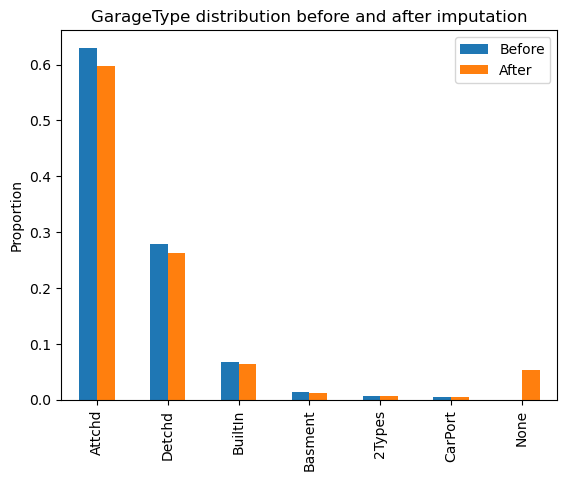

In [164]:
# Calculate the relative frequency (proportion) of each category in 'GarageType' before imputation
before = temp['GarageType'].value_counts(normalize=True)
# Calculate the relative frequency of each category in the imputed variable 'GarageType_missing'
after = temp['GarageType_missing'].value_counts(normalize=True)
# Combine the two series into one DataFrame side by side for comparison
compare_var = pd.concat([before, after], axis=1)
# Rename the columns to clearly indicate which frequencies are before and after imputation
compare_var.columns = ['Before', 'After']
# Plot a bar chart to visually compare the distribution of values before and after imputation
compare_var.plot(kind='bar')
plt.title('GarageType distribution before and after imputation')
plt.ylabel('Proportion')
plt.show()

The distribution plot of the GarageType variable before and after imputation shows that the proportions of the variable’s values have been preserved. The distribution before and after imputation is very similar.

Let’s look at the price distribution for each value of the variable. Most likely, houses without a garage should have lower prices than the others. To do this, we’ll use the function automate_plot_for_cat that we wrote earlier, which requires the target variable. So let’s add the target to our temporary dataset.

In [165]:
temp['SalePrice'] = y_train

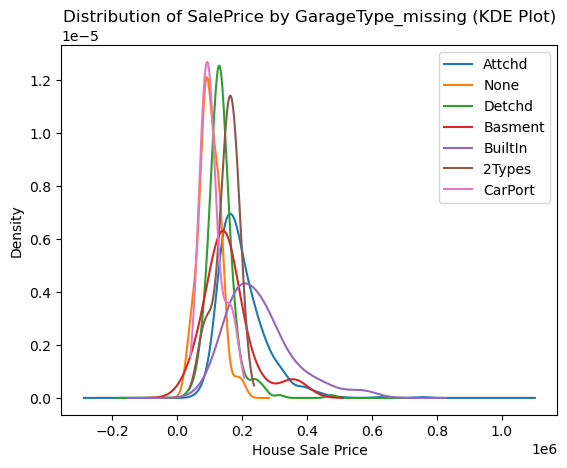

In [166]:
automate_plot_for_cat(temp, 'GarageType_missing', 'SalePrice')

From the plot, we can see that the prices of houses without a garage are slightly lower or similar to those of houses with a carport, which makes sense since a carport is not a full garage.

#### Imputation of missing ordinal categorical variables

In [167]:
print(missing_cat_ordinal)
print(len(missing_cat_ordinal))

['FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']
10


In the missing_cat_ordinal list, for all variables except Electrical, the missing values indicate the absence of the feature they describe (for example, in FireplaceQu, a missing value means there is no fireplace). We will impute all these variables (except Electrical) with the value 'None'. For the missing values in the Electrical variable, we will use the mode.

In [168]:
electrical_mode = X_train['Electrical'].mode()[0]
for var in missing_cat_ordinal:
    if var != 'Electrical':
        temp[var + '_missing'] = X_train[var].fillna('None')
        temp[var] = X_train[var]
    else:
        temp[var + '_missing'] = X_train[var].fillna(electrical_mode)
        temp[var] = X_train[var]

Let’s plot histograms for each variable, showing the values before and after imputation. We’ll check whether the imputation affected the distribution and the proportion of values in each variable.

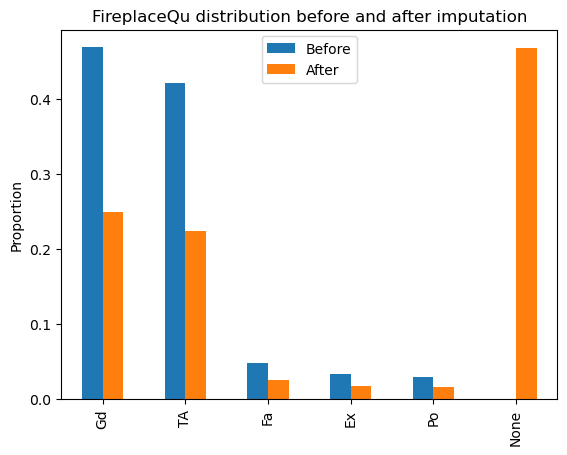

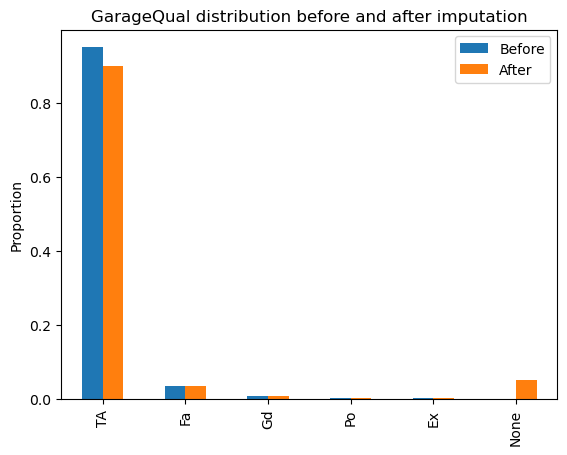

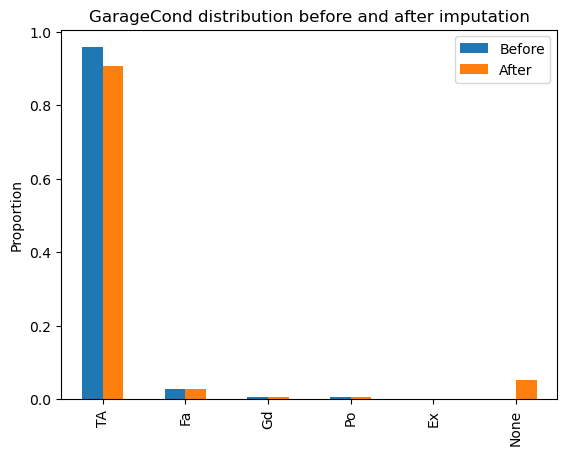

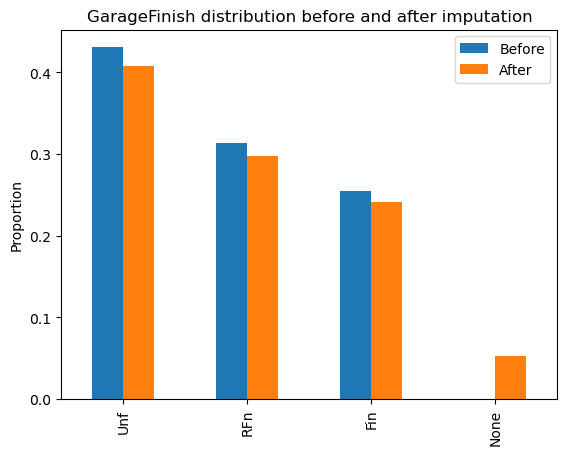

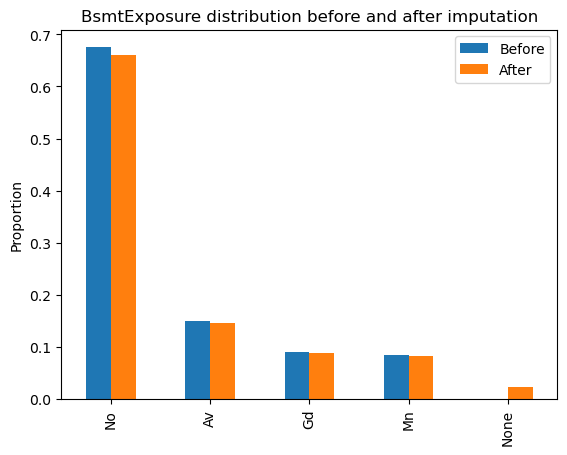

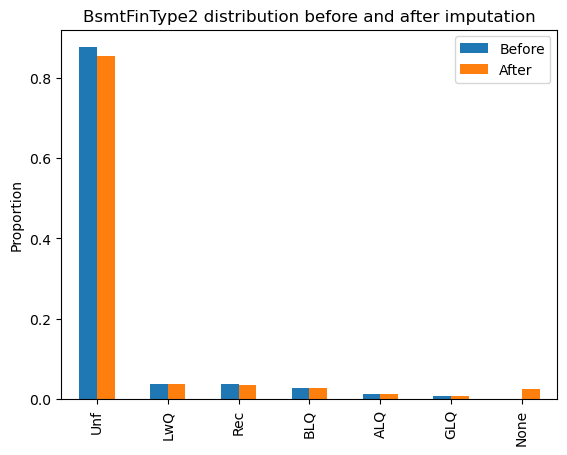

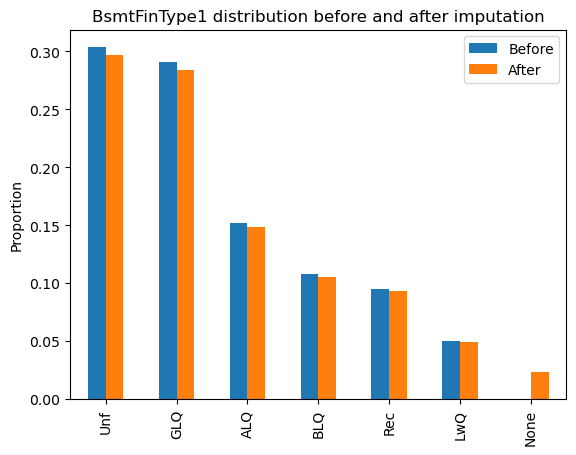

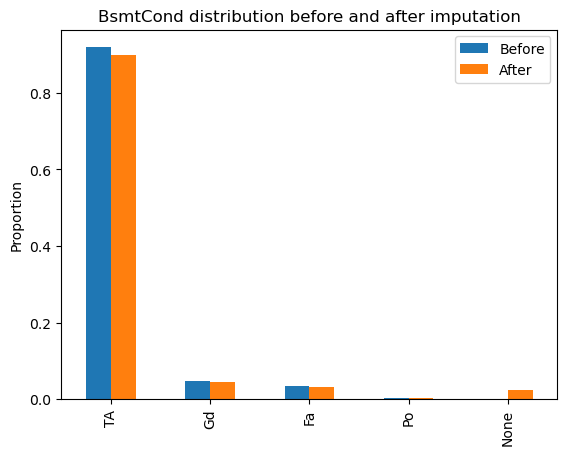

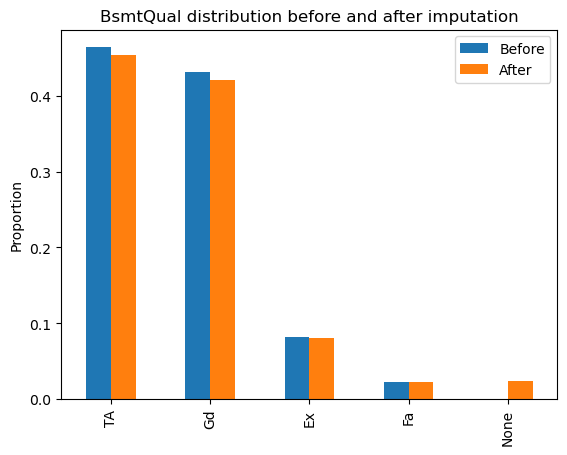

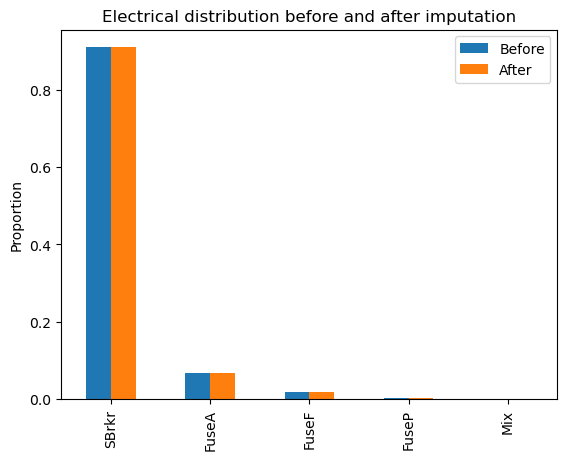

In [169]:
for var in missing_cat_ordinal:
    # Get the distribution of values in the variable `var` BEFORE imputation (as proportions)
    before = temp[var].value_counts(normalize=True)
    # Get the distribution of values in the variable `var` AFTER imputation (as proportions)
    after = temp[var + '_missing'].value_counts(normalize=True)
    # Combine both distributions into a single DataFrame for comparison
    compare_var = pd.concat([before, after], axis=1)
    # Rename the columns for clarity in the plot
    compare_var.columns = ['Before', 'After']
    # Plot a bar chart to visualize the distributions before and after imputation
    compare_var.plot(kind='bar')
    plt.title('{} distribution before and after imputation'.format(var))
    plt.ylabel('Proportion')
    plt.show()

The distribution plots of the variables before and after imputation show that the proportions of the variable values were preserved. The distributions before and after imputation are very similar.

Let’s plot KDE graphs showing the distribution of the target variable for each value in the variable after imputation.

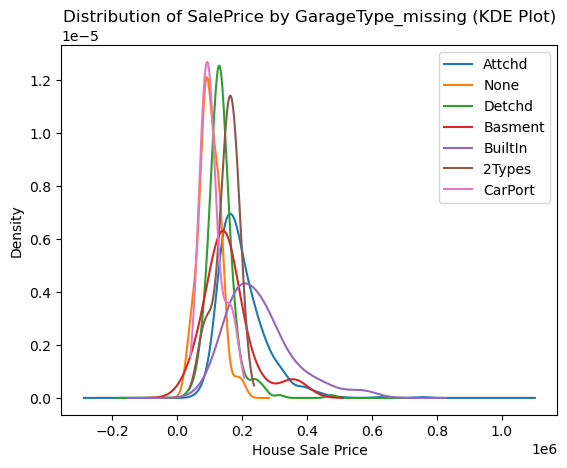

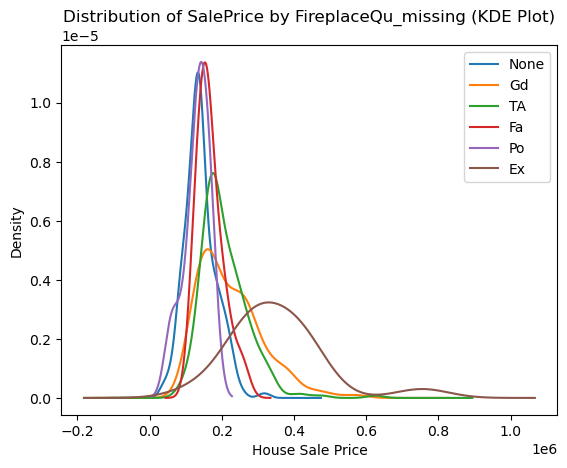

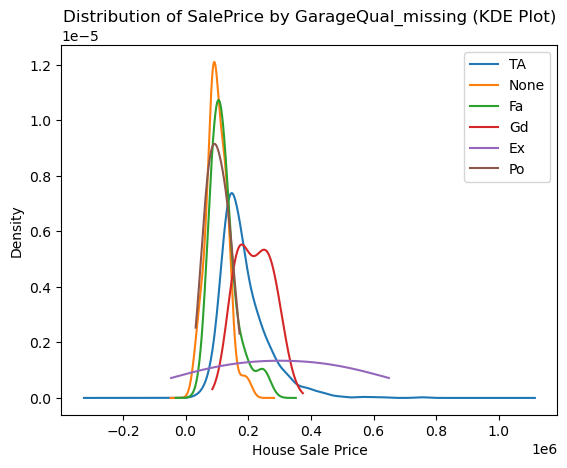

Skipped: Ex (not enough data)


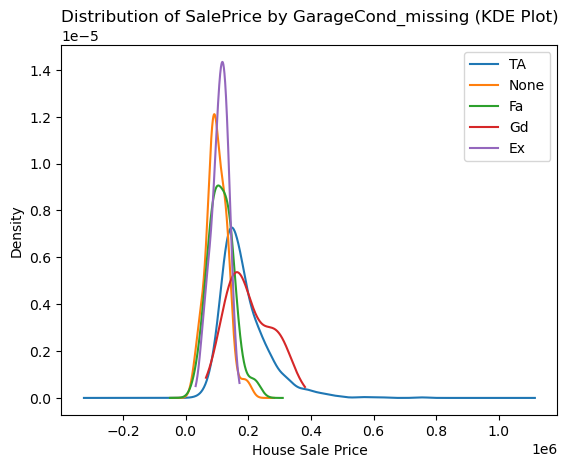

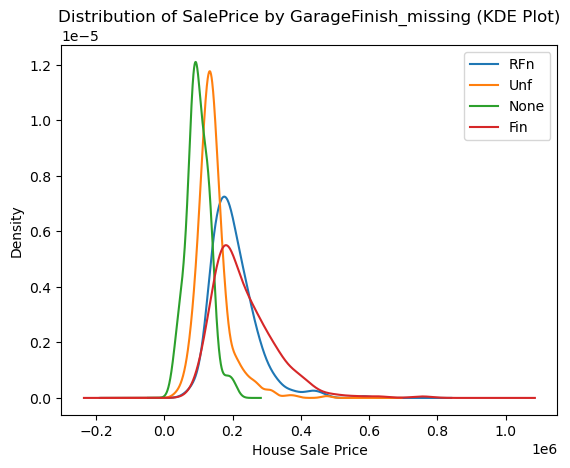

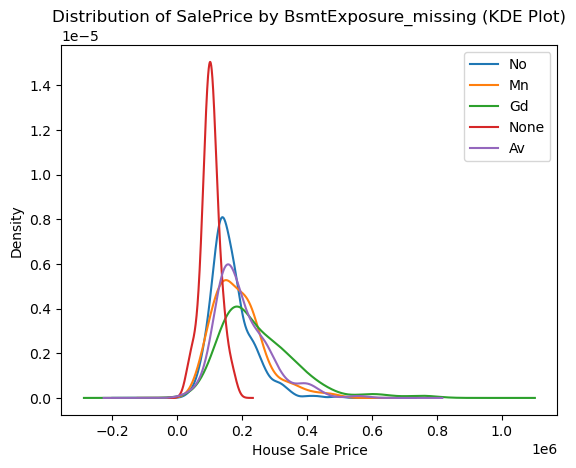

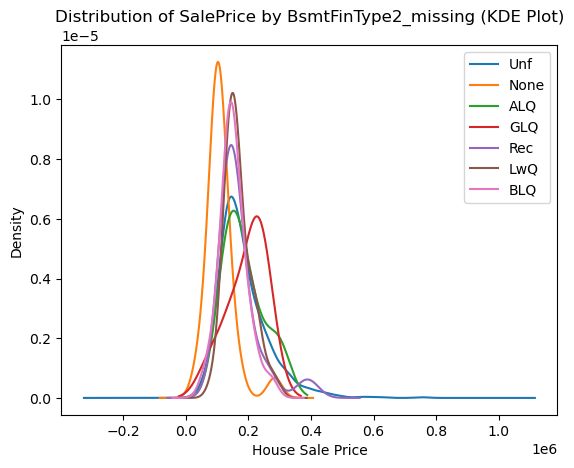

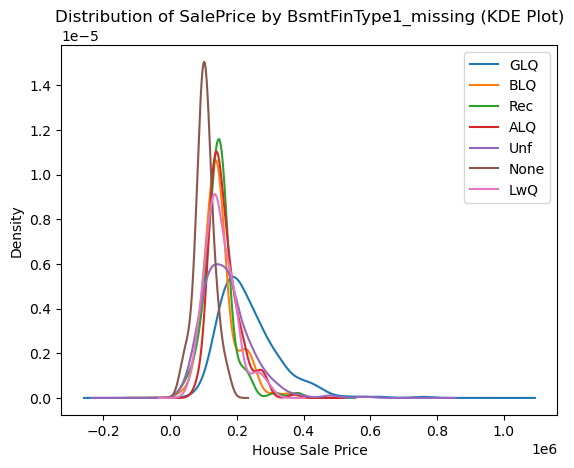

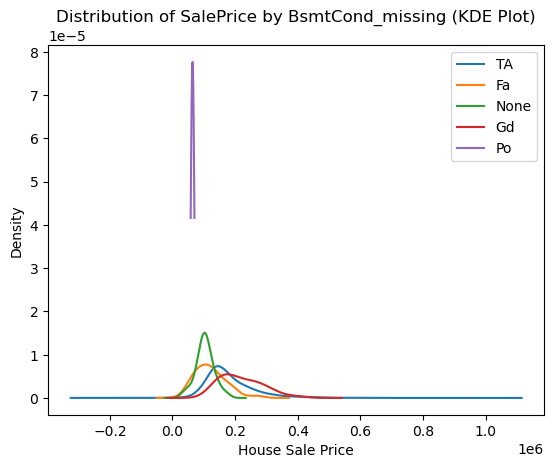

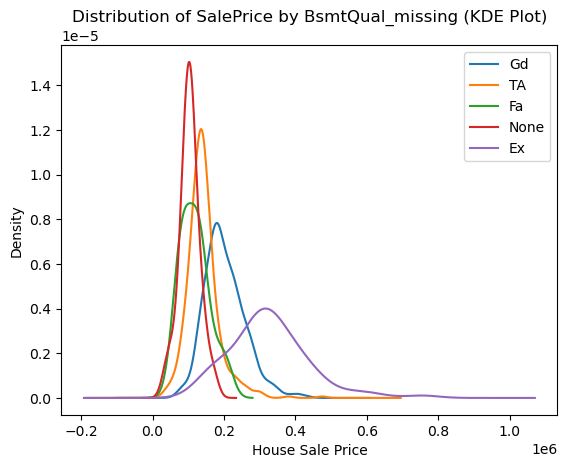

Skipped: Mix (not enough data)


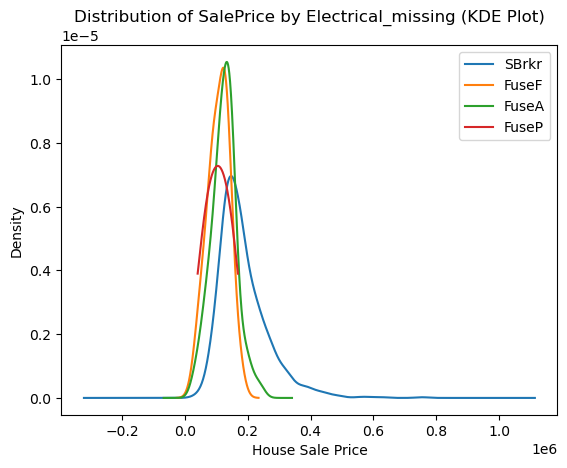

In [170]:
temp_cat_ordinal = [var for var in temp.columns if '_missing' in var] 
for var in temp_cat_ordinal:
    automate_plot_for_cat(temp, var, 'SalePrice')

After imputing the variables with the value “None”, the plot shows that houses with “None” are indeed concentrated in the lower price segment. This confirms our assumption that the missing values in these variables indicate the absence of the feature they describe, rather than being randomly missing data.

#### Imputation of missing continuous numeric variables

In [171]:
print(missing_num_cont)
print(len(missing_num_cont))

['LotFrontage', 'MasVnrArea']
2


##### MasVnrArea

Mas Vnr Area (Continuous): Masonry veneer area in square feet

The variable represents the area of the house’s exterior stone veneer. It is possible that a missing value indicates the absence of veneer. We can fill the missing value with zero, because unlike missing values in the LotFrontage variable, which represents the length of the property’s frontage and cannot be zero, houses without exterior veneer are possible.

In [172]:
temp['MasVnrArea_missing'] = X_train['MasVnrArea'].fillna(0)
temp['MasVnrArea'] = X_train['MasVnrArea']

Let’s plot a KDE (Kernel Density Estimate) graph to compare the distribution of the MasVnrArea variable before and after imputation.

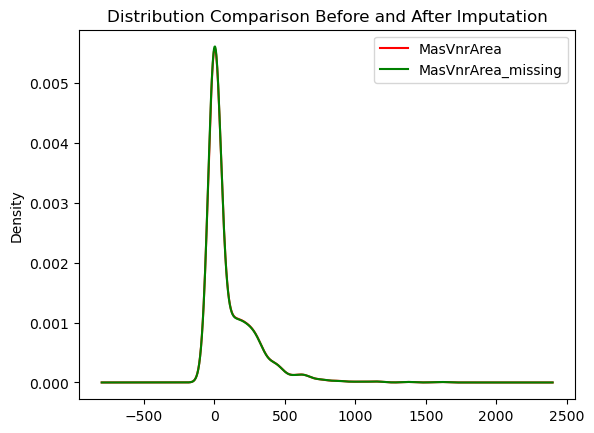

In [173]:
compare_kde_plot(temp, 'MasVnrArea', 'MasVnrArea_missing')

After imputing the missing values of the variable, the distribution remained unchanged. Both graphs (before and after imputation) have the same shape, which indicates the correctness of the approach.

Let’s check how the variance and covariance of the variable has changed.

In [174]:
print('Original variable variance: ', temp['MasVnrArea'].var())
print('Variance after median imputation: ', temp['MasVnrArea_missing'].var())

Original variable variance:  32983.53871003956
Variance after median imputation:  32874.27007404199


In [175]:
temp[['SalePrice', 'MasVnrArea', 'MasVnrArea_missing']].cov()

,SalePrice,MasVnrArea,MasVnrArea_missing
SalePrice,6.105731e+09,6.836439e+06,6.790442e+06
MasVnrArea,6.836439e+06,3.298354e+04,3.298354e+04
MasVnrArea_missing,6.790442e+06,3.298354e+04,3.287427e+04


Variance and covariance have hardly changed.

Let’s plot a boxplot to compare outliers before and after imputation.

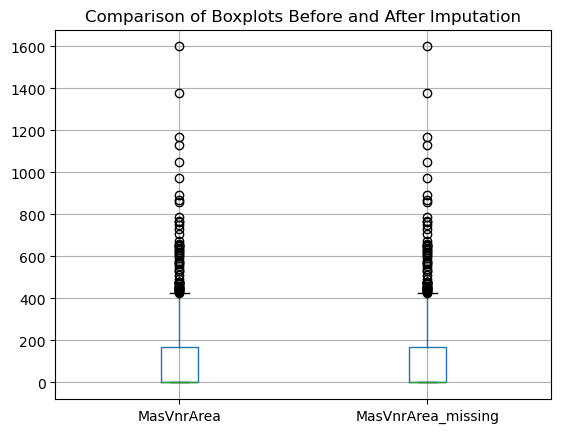

In [176]:
temp[['MasVnrArea', 'MasVnrArea_missing']].boxplot()
plt.title('Comparison of Boxplots Before and After Imputation')
plt.show()

Visually, the outliers remained at the same level after imputation.

Based on the plots, imputing with zeros is appropriate for this variable. There are no visible changes in either the distribution or the outliers. This further confirms that the missing values indeed indicate the absence of masonry veneer on the house.

##### LotFrontage

Lot Frontage (Continuous): Linear feet of street connected to property - Ширина участка по линии улицы

For this variable, it’s difficult to determine the most suitable imputation method in advance. Let’s try replacing the missing values with the mean and the median.

In [177]:
temp['LotFrontage'] = X_train['LotFrontage']
# Calculate the mean and median of the 'LotFrontage' variable
mean = temp['LotFrontage'].mean()
median = temp['LotFrontage'].median()
print('Mean is {}'.format(mean))
print('Median is {}'.format(median))

Mean is 69.66866746698679
Median is 69.0


Let’s create new variables by filling missing values with the mean and median.

In [178]:
temp['LotFrontage_mean'] = temp['LotFrontage'].fillna(mean)
temp['LotFrontage_median'] = temp['LotFrontage'].fillna(median)

Let’s plot a KDE graph showing the distribution before and after imputation.

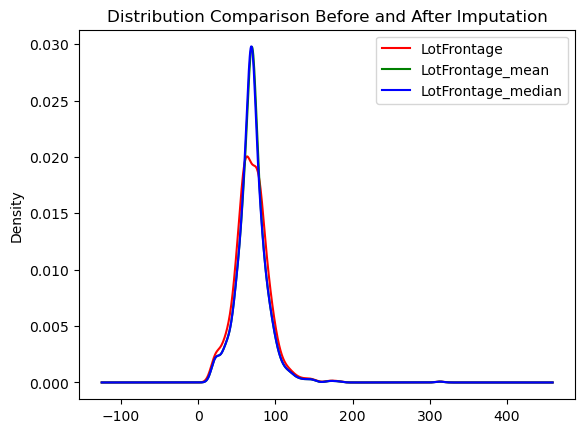

In [179]:
compare_kde_plot(temp, 'LotFrontage', 'LotFrontage_mean', 'LotFrontage_median')

The plot shows how the distribution of the LotFrontage variable changed after imputation. There is little difference between imputing missing values with the mean or the median.

Let’s check how the variance and covariance of the variable has changed.

In [180]:
print('Original variable variance: ', temp['LotFrontage'].var())
print('Variance after mean imputation: ', temp['LotFrontage_mean'].var())
print('Variance after median imputation: ', temp['LotFrontage_median'].var())

Original variable variance:  532.5872021885677
Variance after mean imputation:  433.9985819989112
Variance after median imputation:  434.0660426541647


In [181]:
temp[['SalePrice', 'LotFrontage', 'LotFrontage_mean', 'LotFrontage_median']].cov()

,SalePrice,LotFrontage,LotFrontage_mean,LotFrontage_median
SalePrice,6.105731e+09,668964.454191,545130.681574,544838.836893
LotFrontage,6.689645e+05,532.587202,532.587202,532.587202
LotFrontage_mean,5.451307e+05,532.587202,433.998582,433.998582
LotFrontage_median,5.448388e+05,532.587202,433.998582,434.066043


The variance of the original variable is approximately 532.59. After replacing the missing values with the mean or median, the variance decreases to about 434. This shows that both imputation methods slightly reduce the spread of the data because filling in missing values with a single constant (mean or median) lowers the variability. The difference in variance between mean and median imputation is very small, indicating that these methods have a similar impact on the data’s variability.

Let’s plot a boxplot to compare outliers before and after imputation.

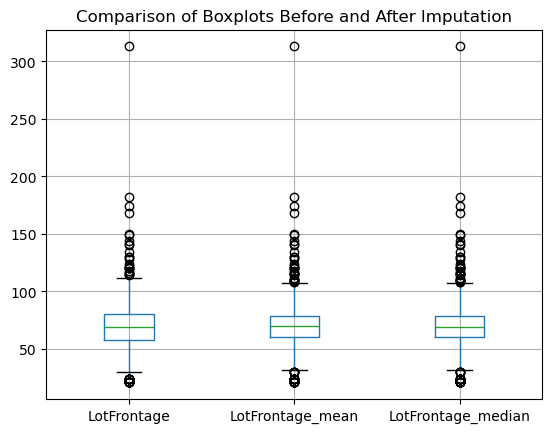

In [182]:
temp[['LotFrontage', 'LotFrontage_mean', 'LotFrontage_median']].boxplot()
plt.title('Comparison of Boxplots Before and After Imputation')
plt.show()

The plot shows an increase in the number of outliers after imputation with both the mean and the median.

Since we know for sure that the missing values in categorical variables, both ordinal and nominal, are not random but indicate the absence of the feature they describe, we will perform manual imputation for these variables.
As for the numerical variables, we will try replacing missing values in MasVnrArea with zero, and for LotFrontage, we will experiment with different types of imputation.

Let’s double-check once again to make sure no variables have been lost.

In [183]:
X_train.shape

(1022, 64)

In [184]:
len(categorical) + len(discrete) + len(continuous)

64

The number of variables matches.

Earlier, we divided our categorical variables into ordinal and nominal. Let’s check if all the variables are in place.

In [185]:
len(categorical) == len(ordinal_categorical) + len(nominal_categorical) + len(binary_categorical)

True